In [2]:
!git clone https://github.com/facebookresearch/segment-anything-2
%cd segment-anything-2
!pip3.10 install -q -e .

fatal: destination path 'segment-anything-2' already exists and is not an empty directory.
/media/usama/SSD/Data_for_SAM2_model_Finetuning/Sam2_fine_tuning_/segment-anything-2


/media/usama/SSD/Data_for_SAM2_model_Finetuning/Sam2_environ/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
!pwd

/media/usama/SSD/Data_for_SAM2_model_Finetuning/Sam2_fine_tuning_/segment-anything-2


In [21]:
!pip3.10 install matplotlib

  Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 4.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.5 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (324 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)


In [8]:
!pip3.10 install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.5 MB)


In [4]:
!wget -O sam2_hiera_small.pt "https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_small.pt"

--2024-11-27 10:08:45--  https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.160.77.50, 3.160.77.80, 3.160.77.93, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.160.77.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184309650 (176M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2_hiera_small.pt’

sam2_hiera_small.pt 100%[===================>] 175.77M  3.92MB/s    in 43s     

2024-11-27 10:09:28 (4.12 MB/s) - ‘sam2_hiera_small.pt’ saved [184309650/184309650]



In [4]:
import numpy as np
import torch
import cv2
import os
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

/media/usama/SSD/Data_for_SAM2_model_Finetuning/Sam2_fine_tuning_/segment-anything-2/sam2/modeling/sam/transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()


In [5]:
def load_image_mask_and_points(image_dir, mask_dir, txt_dir):
    # List all images in the image directory
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

    # Iterate over all image files
    for image_filename in image_files:
        print("Processing image:", image_filename)
        
        # Construct corresponding mask and txt file paths
        mask_filename = os.path.join(mask_dir, image_filename)  # Assuming mask has the same name as the image
        print("Mask filename:", mask_filename)
        txt_filename = os.path.join(txt_dir, os.path.splitext(image_filename)[0] + '.txt')  # Change extension to .txt
        
        # Read image and mask
        Img = cv2.imread(os.path.join(image_dir, image_filename))[..., ::-1]  # Read image
        ann_map = cv2.imread(mask_filename)  # Read annotation (mask)
        
        # Read points from the text file
        with open(txt_filename, 'r') as f:
            points = [list(map(int, line.strip().split(','))) for line in f.readlines()]
            print("Points:", points)

        # Resize image and mask
        r = np.min([1024 / Img.shape[1], 1024 / Img.shape[0]])  # Scaling factor
        Img = cv2.resize(Img, (int(Img.shape[1] * r), int(Img.shape[0] * r)))
        ann_map = cv2.resize(ann_map, (int(ann_map.shape[1] * r), int(ann_map.shape[0] * r)))

        # Yield the processed image, mask, points, and labels
        yield Img, np.array(ann_map), np.array(points), np.ones([len(points), 1])

# image_dir = '/media/usama/SSD/Data_for_SAM2_model_Finetuning/notebook/data_1/images/'
# mask_dir = '/media/usama/SSD/Data_for_SAM2_model_Finetuning/notebook/data_1/masks/'
# txt_dir = '/media/usama/SSD/Data_for_SAM2_model_Finetuning/notebook/data_1/txt_files/'
# data_generator_1 = load_image_mask_and_points(image_dir, mask_dir, txt_dir)






In [ ]:
# total_samples = 10 # Total number of samples in your dataset
# batch_size = 1      # Batch size
# NO_OF_STEPS = 3000    # Total number of iterations

# # Calculate iterations per epoch
# iterations_per_epoch = total_samples // batch_size

# # Calculate number of epochs
# number_of_epochs = NO_OF_STEPS // iterations_per_epoch

# print(f"Number of epochs: {number_of_epochs}")

Number of epochs: 300


In [8]:
!pwd

/media/usama/SSD/Data_for_SAM2_model_Finetuning/Sam2_fine_tuning_


In [9]:
%cd segment-anything-2/

/media/usama/SSD/Data_for_SAM2_model_Finetuning/Sam2_fine_tuning_/segment-anything-2


/media/usama/SSD/Data_for_SAM2_model_Finetuning/Sam2_environ/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [10]:
sam2_checkpoint = "sam2_hiera_small.pt"  # @param ["sam2_hiera_tiny.pt", "sam2_hiera_small.pt", "sam2_hiera_base_plus.pt", "sam2_hiera_large.pt"]
model_cfg = "sam2_hiera_s.yaml" # @param ["sam2_hiera_t.yaml", "sam2_hiera_s.yaml", "sam2_hiera_b+.yaml", "sam2_hiera_l.yaml"]

sam2_model = build_sam2(model_cfg, sam2_checkpoint, device="cuda")
predictor = SAM2ImagePredictor(sam2_model)

In [14]:
# Train mask decoder.
predictor.model.sam_mask_decoder.train(True)

# Train prompt encoder.
predictor.model.sam_prompt_encoder.train(True)

# Configure optimizer.
optimizer=torch.optim.AdamW(params=predictor.model.parameters(),lr=0.0001,weight_decay=1e-4) #1e-5, weight_decay = 4e-5

# Mix precision.
scaler = torch.cuda.amp.GradScaler()

# No. of steps to train the model.
no_of_epochs = 100 # @param


# Fine-tuned model name.
FINE_TUNED_MODEL_NAME = "fine_tuned_sam2"


In [13]:
image_dir = '/media/usama/SSD/Data_for_SAM2_model_Finetuning/notebook/output_1/images/'
mask_dir = '/media/usama/SSD/Data_for_SAM2_model_Finetuning/notebook/output_1/masks/'
txt_dir = '/media/usama/SSD/Data_for_SAM2_model_Finetuning/notebook/output_1/txt_files/'

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=500, gamma=0.2) # 500 , 250, gamma = 0.1
accumulation_steps = 4  # Number of steps to accumulate gradients before updating

for epoch in range(1, no_of_epochs + 1):
   with torch.cuda.amp.autocast():
      #  image, mask, input_point, input_label = load_image_mask_and_points(image_dir, mask_dir, txt_dir)
       data_generator_21 = load_image_mask_and_points(image_dir, mask_dir, txt_dir)
       for image, mask, input_point, input_label in data_generator_21:

          input_label = input_label.flatten()

        #   if image is None or mask is None or input_label == 0:
        #       continue
          if image is None or mask is None or np.any(input_label == 0):
              continue

          #  input_label = np.array(num_masks)
          if not isinstance(input_point, np.ndarray) or not isinstance(input_label, np.ndarray):
              continue

          if input_point.size == 0 or input_label.size == 0:
              continue

          predictor.set_image(image)
          mask_input, unnorm_coords, labels, unnorm_box = predictor._prep_prompts(input_point, input_label, box=None, mask_logits=None, normalize_coords=True)
          if unnorm_coords is None or labels is None or unnorm_coords.shape[0] == 0 or labels.shape[0] == 0:
              continue

          sparse_embeddings, dense_embeddings = predictor.model.sam_prompt_encoder(
              points=(unnorm_coords, labels), boxes=None, masks=None,
          )

          batched_mode = unnorm_coords.shape[0] > 1
          high_res_features = [feat_level[-1].unsqueeze(0) for feat_level in predictor._features["high_res_feats"]]
          low_res_masks, prd_scores, _, _ = predictor.model.sam_mask_decoder(
              image_embeddings=predictor._features["image_embed"][-1].unsqueeze(0),
              image_pe=predictor.model.sam_prompt_encoder.get_dense_pe(),
              sparse_prompt_embeddings=sparse_embeddings,
              dense_prompt_embeddings=dense_embeddings,
              multimask_output=True,
              repeat_image=batched_mode,
              high_res_features=high_res_features,
          )
          prd_masks = predictor._transforms.postprocess_masks(low_res_masks, predictor._orig_hw[-1])

          gt_mask = torch.tensor(mask.astype(np.float32)).cuda()
          gt_mask =gt_mask.permute(2, 0, 1)
        #   print("gt mask shape",gt_mask.shape)
          prd_mask = torch.sigmoid(prd_masks[:, 0])
        #   print("prd mask shape",prd_mask.shape)
          seg_loss = (-gt_mask * torch.log(prd_mask + 0.000001) - (1 - gt_mask) * torch.log((1 - prd_mask) + 0.00001)).mean()

          inter = (gt_mask * (prd_mask > 0.5)).sum(1).sum(1)
          iou = inter / (gt_mask.sum(1).sum(1) + (prd_mask > 0.5).sum(1).sum(1) - inter)
          score_loss = torch.abs(prd_scores[:, 0] - iou).mean()
          loss = seg_loss + score_loss * 0.05

          # Apply gradient accumulation
          loss = loss / accumulation_steps
          scaler.scale(loss).backward()

          # Clip gradients
          torch.nn.utils.clip_grad_norm_(predictor.model.parameters(), max_norm=1.0)

          if epoch % accumulation_steps == 0:
              scaler.step(optimizer)
              scaler.update()
              predictor.model.zero_grad()

          # Update scheduler
          scheduler.step()

          if epoch % 10 == 0:
              FINE_TUNED_MODEL = FINE_TUNED_MODEL_NAME + "_" + str(epoch) + ".torch"
              torch.save(predictor.model.state_dict(), FINE_TUNED_MODEL)

          if epoch == 1:
              mean_iou = 0

          mean_iou = mean_iou * 0.99 + 0.01 * np.mean(iou.cpu().detach().numpy())

          if epoch % 100 == 0:
              print("Step " + str(epoch) + ":\t", "Accuracy (IoU) = ", mean_iou)


NameError: name 'no_of_epochs' is not defined

In [ ]:

# def read_image_and_mask_path(image_path, mask_path):  # read and resize image and mask
#    img = cv2.imread(image_path)[..., ::-1]  # Convert BGR to RGB
#    mask = cv2.imread(mask_path, 0)
#    r = np.min([1024 / img.shape[1], 1024 / img.shape[0]])
#    img = cv2.resize(img, (int(img.shape[1] * r), int(img.shape[0] * r)))
#    mask = cv2.resize(mask, (int(mask.shape[1] * r), int(mask.shape[0] * r)))
#    return img, mask

# def get_foreground_points(mask, num_points):  # Sample points inside the input mask
#    points = []
#    coords = np.argwhere(mask > 0)
#    for i in range(num_points):
#        yx = np.array(coords[np.random.randint(len(coords))])
#        points.append([[yx[1], yx[0]]])
#    return np.array(points)

input_points [[[588 166]]

 [[626 168]]]
np scores [0.99978834 0.9997842 ]
sorted masks 2
mask shape (1024, 1024)
mask bool [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
mask shape (1024, 1024)
mask bool [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


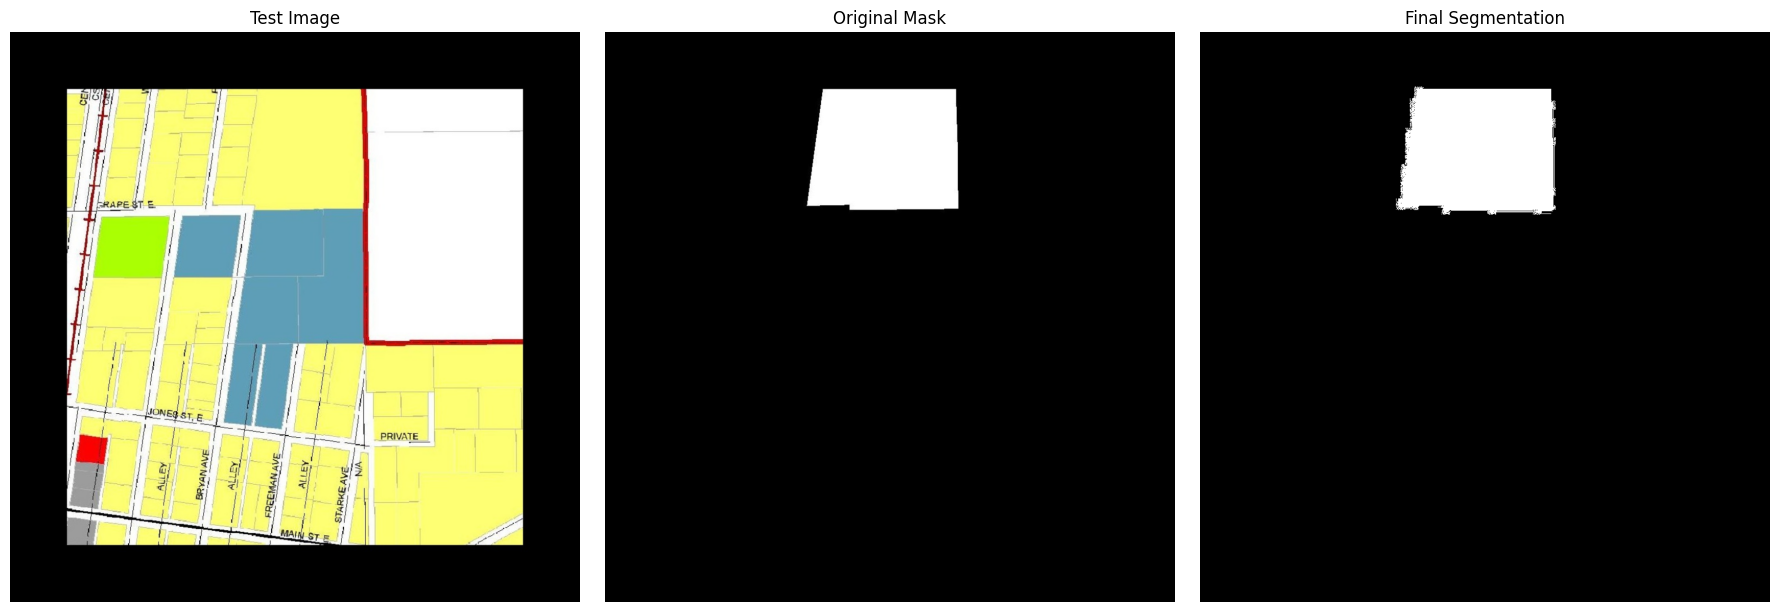

In [71]:
import matplotlib.pyplot as plt
image_path = "/media/usama/SSD/Data_for_SAM2_model_Finetuning/notebook/data_test/images/0_fl_bowling_10_copy0.jpg"
mask_path = "/media/usama/SSD/Data_for_SAM2_model_Finetuning/notebook/data_test/masks/0_fl_bowling_10_copy0.jpg"
def read_image_and_mask_path(image_path, mask_path):  # read and resize image and mask
   img = cv2.imread(image_path)[..., ::-1]  # Convert BGR to RGB
   mask = cv2.imread(mask_path, 0)
   r = np.min([1024 / img.shape[1], 1024 / img.shape[0]])
   img = cv2.resize(img, (int(img.shape[1] * r), int(img.shape[0] * r)))
   mask = cv2.resize(mask, (int(mask.shape[1] * r), int(mask.shape[0] * r)))
   return img, mask

def get_foreground_points(mask, num_points):  # Sample points inside the input mask
   points = []
   coords = np.argwhere(mask > 0)
   for i in range(num_points):
       yx = np.array(coords[np.random.randint(len(coords))])
       points.append([[yx[1], yx[0]]])
   return np.array(points)

# Load the selected image and mask
image, mask = read_image_and_mask_path(image_path, mask_path)

# Generate random points for the input
num_samples = 2 # Number of points per segment to sample
input_points = get_foreground_points(mask, num_samples)
print("input_points",input_points)


# Load the fine-tuned model
FINE_TUNED_MODEL_WEIGHTS = "fine_tuned_sam2_300.torch"
sam2_model = build_sam2(model_cfg, sam2_checkpoint, device="cuda")

# Build net and load weights
predictor = SAM2ImagePredictor(sam2_model)
predictor.model.load_state_dict(torch.load(FINE_TUNED_MODEL_WEIGHTS))

# Perform inference and predict masks
with torch.no_grad():
   predictor.set_image(image)
   masks, scores, logits = predictor.predict(
       point_coords=input_points,
       point_labels=np.ones([input_points.shape[0], 1])
   )


if num_samples ==1:
    np_masks = np.array(masks)
else:
    np_masks = np.array(masks[:, 0])

# Process the predicted masks and sort by scores
# np_masks = np.array(masks[:, 0])
# np_scores = scores[:, 0]
if scores.ndim == 1:
    np_scores = scores  # If it's 1D, use it directly
    print("np scores",np_scores)
else:
    np_scores = scores[:, 0] 
    print("np scores",np_scores)
# print("np scores",np_scores)
sorted_masks = np_masks[np.argsort(np_scores)]
print("sorted masks",len(sorted_masks))

# Initialize segmentation map and occupancy mask
seg_map = np.zeros_like(sorted_masks[0], dtype=np.uint8)
# occupancy_mask = np.zeros_like(sorted_masks[0], dtype=bool)

# Combine masks to create the final segmentation map
for i in range(sorted_masks.shape[0]):

   if num_samples==1:
        mask = sorted_masks[0]
   
   print("mask shape",mask.shape)
   
#    if (mask * occupancy_mask).sum() / mask.sum() > 0.15:
    #    continue

   mask_bool = mask.astype(bool)
   print("mask bool",mask_bool)
#    mask_bool[occupancy_mask] = False  # Set overlapping areas to False in the mask
   seg_map[mask_bool] = i + 1  # Use boolean mask to index seg_map
   
#    occupancy_mask[mask_bool] = True  # Update occupancy_mask
#    cv2.imwrite("seg_mask.jpg",seg_map)

# # Visualization: Show the original image, mask, and final segmentation side by side
seg_map = seg_map.astype(np.uint8)
# print(seg_map)
_,seg_map = cv2.threshold(seg_map,0,255,cv2.THRESH_BINARY)
cv2.imwrite("seg_mask_1.jpg",seg_map)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Test Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Final Segmentation')
plt.imshow(seg_map, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()